<a href="https://colab.research.google.com/github/anandaditya07/ML_LAB/blob/main/Experiment_5_Income_Classification_using_Naive_Bayes_on_Adult_Census_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment 5 : Income Classification using Naive Bayes on Adult Census Dataset**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
features =  ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "MartialStatus", "Occupation", "Relationship", "Race", "Sex", "CapitalGain", "CapitalLoss", "Hoursperweek", "Country", "Target"]

In [25]:
data_train = pd.read_csv('/content/drive/MyDrive/adult.csv', names = features)
data_train.head()

,Age,Workclass,fnlwgt,Education,Education-Num,MartialStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,Hoursperweek,Country,Target
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [26]:
data_test = pd.read_csv('/content/drive/MyDrive/adult.csv', names = features)
data_test.head()

,Age,Workclass,fnlwgt,Education,Education-Num,MartialStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,Hoursperweek,Country,Target
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


#### **Data Pre-Processing**

In [27]:
data_train.shape

(32562, 15)

In [28]:
data_test.shape

(32562, 15)

In [29]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32562 non-null  object
 1   Workclass      32562 non-null  object
 2   fnlwgt         32562 non-null  object
 3   Education      32562 non-null  object
 4   Education-Num  32562 non-null  object
 5   MartialStatus  32562 non-null  object
 6   Occupation     32562 non-null  object
 7   Relationship   32562 non-null  object
 8   Race           32562 non-null  object
 9   Sex            32562 non-null  object
 10  CapitalGain    32562 non-null  object
 11  CapitalLoss    32562 non-null  object
 12  Hoursperweek   32562 non-null  object
 13  Country        32562 non-null  object
 14  Target         32562 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


In [30]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32562 non-null  object
 1   Workclass      32562 non-null  object
 2   fnlwgt         32562 non-null  object
 3   Education      32562 non-null  object
 4   Education-Num  32562 non-null  object
 5   MartialStatus  32562 non-null  object
 6   Occupation     32562 non-null  object
 7   Relationship   32562 non-null  object
 8   Race           32562 non-null  object
 9   Sex            32562 non-null  object
 10  CapitalGain    32562 non-null  object
 11  CapitalLoss    32562 non-null  object
 12  Hoursperweek   32562 non-null  object
 13  Country        32562 non-null  object
 14  Target         32562 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


In [31]:
data_train.isnull().sum()

,0
Age,0
Workclass,0
fnlwgt,0
Education,0
Education-Num,0
MartialStatus,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [32]:
data_test.isnull().sum()

,0
Age,0
Workclass,0
fnlwgt,0
Education,0
Education-Num,0
MartialStatus,0
Occupation,0
Relationship,0
Race,0
Sex,0


#### **Filling the NAN Values**

In [33]:
data_test['Workclass'].fillna('Workclass', inplace = True)

/tmp/ipython-input-4266554683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Workclass'].fillna('Workclass', inplace = True)


In [34]:
data_test['fnlwgt'].fillna('fnlwgt', inplace = True)

/tmp/ipython-input-2812201653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['fnlwgt'].fillna('fnlwgt', inplace = True)


In [35]:
data_test['Education'].fillna('Education', inplace = True)

/tmp/ipython-input-3516765981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Education'].fillna('Education', inplace = True)


In [36]:
data_test['Education-Num'].fillna('Education-Num', inplace = True)

/tmp/ipython-input-207195750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Education-Num'].fillna('Education-Num', inplace = True)


In [37]:
data_test['MartialStatus'].fillna('MartialStatus', inplace = True)

/tmp/ipython-input-4145313879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['MartialStatus'].fillna('MartialStatus', inplace = True)


In [38]:
data_test['Occupation'].fillna('Occupation', inplace = True)

/tmp/ipython-input-3321476358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Occupation'].fillna('Occupation', inplace = True)


In [39]:
data_test['Relationship'].fillna('Relationship', inplace = True)

/tmp/ipython-input-3487996970.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Relationship'].fillna('Relationship', inplace = True)


In [40]:
data_test['Race'].fillna('Race', inplace = True)

/tmp/ipython-input-2356132634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Race'].fillna('Race', inplace = True)


In [41]:
data_test['Sex'].fillna('Sex', inplace = True)

/tmp/ipython-input-1242112921.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Sex'].fillna('Sex', inplace = True)


In [42]:
data_test['CapitalGain'].fillna('CapitalGain', inplace = True)

/tmp/ipython-input-2229383635.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['CapitalGain'].fillna('CapitalGain', inplace = True)


In [43]:
data_test['CapitalLoss'].fillna('CapitalLoss', inplace = True)

/tmp/ipython-input-3294299490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['CapitalLoss'].fillna('CapitalLoss', inplace = True)


In [44]:
data_test['Hoursperweek'].fillna('Hoursperweek', inplace = True)

/tmp/ipython-input-3191876679.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Hoursperweek'].fillna('Hoursperweek', inplace = True)


In [45]:
data_test['Country'].fillna('Country', inplace = True)

/tmp/ipython-input-1929342691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Country'].fillna('Country', inplace = True)


In [46]:
data_test['Target'].fillna('Target', inplace = True)

/tmp/ipython-input-3929978449.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Target'].fillna('Target', inplace = True)


#### **Label Encoder**

In [47]:
le = LabelEncoder()

#### **For Train Data**

In [48]:
label = data_train.select_dtypes(include = 'object').columns
for i in label:
    data_train[i] = le.fit_transform(data_train[i].astype(str))

In [49]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            32562 non-null  int64
 1   Workclass      32562 non-null  int64
 2   fnlwgt         32562 non-null  int64
 3   Education      32562 non-null  int64
 4   Education-Num  32562 non-null  int64
 5   MartialStatus  32562 non-null  int64
 6   Occupation     32562 non-null  int64
 7   Relationship   32562 non-null  int64
 8   Race           32562 non-null  int64
 9   Sex            32562 non-null  int64
 10  CapitalGain    32562 non-null  int64
 11  CapitalLoss    32562 non-null  int64
 12  Hoursperweek   32562 non-null  int64
 13  Country        32562 non-null  int64
 14  Target         32562 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [50]:
data_train.isnull().sum()

,0
Age,0
Workclass,0
fnlwgt,0
Education,0
Education-Num,0
MartialStatus,0
Occupation,0
Relationship,0
Race,0
Sex,0


#### **For Test Data**

In [51]:
label1 = data_test.select_dtypes(include = 'object').columns
for i in label1:
    data_test[i] = le.fit_transform(data_test[i].astype(str))

In [52]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            32562 non-null  int64
 1   Workclass      32562 non-null  int64
 2   fnlwgt         32562 non-null  int64
 3   Education      32562 non-null  int64
 4   Education-Num  32562 non-null  int64
 5   MartialStatus  32562 non-null  int64
 6   Occupation     32562 non-null  int64
 7   Relationship   32562 non-null  int64
 8   Race           32562 non-null  int64
 9   Sex            32562 non-null  int64
 10  CapitalGain    32562 non-null  int64
 11  CapitalLoss    32562 non-null  int64
 12  Hoursperweek   32562 non-null  int64
 13  Country        32562 non-null  int64
 14  Target         32562 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [53]:
data_test.isnull().sum()

,0
Age,0
Workclass,0
fnlwgt,0
Education,0
Education-Num,0
MartialStatus,0
Occupation,0
Relationship,0
Race,0
Sex,0


#### **Seperation of X and Y Lables of Train Data**

In [54]:
X_train = data_train.iloc[:,0:14]
Y_train = data_train.iloc[:,-1]

#### **Seperation of X and Y Lables of Test Data**

In [55]:
X_test = data_test.iloc[:,0:14]
Y_test = data_test.iloc[:,-1]

#### **Naive Bayes Model**

In [56]:
Naive_Bayes = naive_bayes.MultinomialNB()

In [57]:
Naive_Bayes.fit(X_train, Y_train)
Y_pred = Naive_Bayes.predict(X_test)
Accuracy_of_Naive_Bayes = Naive_Bayes.score(X_test, Y_test)*100
print ("Accuracy of Naive Bayes Model:", Accuracy_of_Naive_Bayes)

Accuracy of Naive Bayes Model: 65.22633744855966


In [58]:
Recall_Score_of_Naive_Bayes = recall_score(Y_test, Y_pred, average='macro') * 100
print ("Recall Score of Naive Bayes Model:", Recall_Score_of_Naive_Bayes)

Recall Score of Naive Bayes Model: 69.70716895960946


In [59]:
Precision_Score_of_Naive_Bayes = precision_score(Y_test, Y_pred, average = 'macro') * 100
print ("Precision Score of Naive Bayes Model:", Precision_Score_of_Naive_Bayes)

Precision Score of Naive Bayes Model: 38.49060262368387


In [60]:
F1_Score_of_Naive_Bayes = f1_score(Y_test, Y_pred, average='macro') * 100
print ("F1 Score of Naive Bayes Model:", F1_Score_of_Naive_Bayes)

F1 Score of Naive Bayes Model: 37.396826085456205


#### **KNN Model**

In [61]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [62]:
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
Accuracy_of_KNN = (accuracy_score(Y_pred, Y_test)) * 100
print ("Accuracy of KNN Model:", Accuracy_of_KNN)

Accuracy of KNN Model: 83.13371414532277


In [63]:
Recall_Score_of_KNN = recall_score(Y_test, Y_pred, average='macro')*100
print ("Recall Score of KNN Model:", Recall_Score_of_KNN)

Recall Score of KNN Model: 47.924371031478245


In [64]:
Precision_Score_of_KNN = precision_score(Y_test, Y_pred, average = 'macro') * 100
print ("Precision Score of KNN Model:", Precision_Score_of_KNN)

Precision Score of KNN Model: 52.27619599239915


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
F1_Score_of_KNN = f1_score(Y_test, Y_pred, average='macro') * 100
print ("F1 Score of KNN Model:", F1_Score_of_KNN)

F1 Score of KNN Model: 49.429998469423545


#### **Comparsion of Both KNN And Naive Bayes Model**

In [66]:
print("Accuray of KNN: ", Accuracy_of_KNN)
print("Accuray of Naive Bayes: ", Accuracy_of_Naive_Bayes)

Accuray of KNN:  83.13371414532277
Accuray of Naive Bayes:  65.22633744855966


In [67]:
x = ['KNN','Naive Bayes']
y = [Accuracy_of_KNN, Accuracy_of_Naive_Bayes]
y

[83.13371414532277, 65.22633744855966]

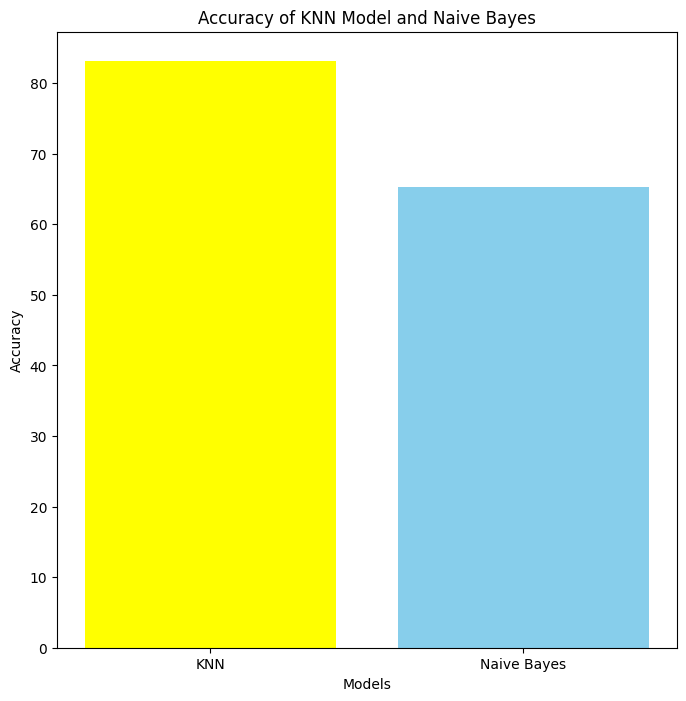

In [68]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['yellow', 'skyblue'])
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title("Accuracy of KNN Model and Naive Bayes")
plt.show()


In [69]:
print ("Recall Score of Naive Bayes Model:", Recall_Score_of_Naive_Bayes)
print ("Recall Score of Naive Bayes Model:", Recall_Score_of_KNN)

Recall Score of Naive Bayes Model: 69.70716895960946
Recall Score of Naive Bayes Model: 47.924371031478245


In [70]:
x = ['KNN','Naive Bayes']
y = [Recall_Score_of_KNN, Recall_Score_of_Naive_Bayes]
y

[47.924371031478245, 69.70716895960946]

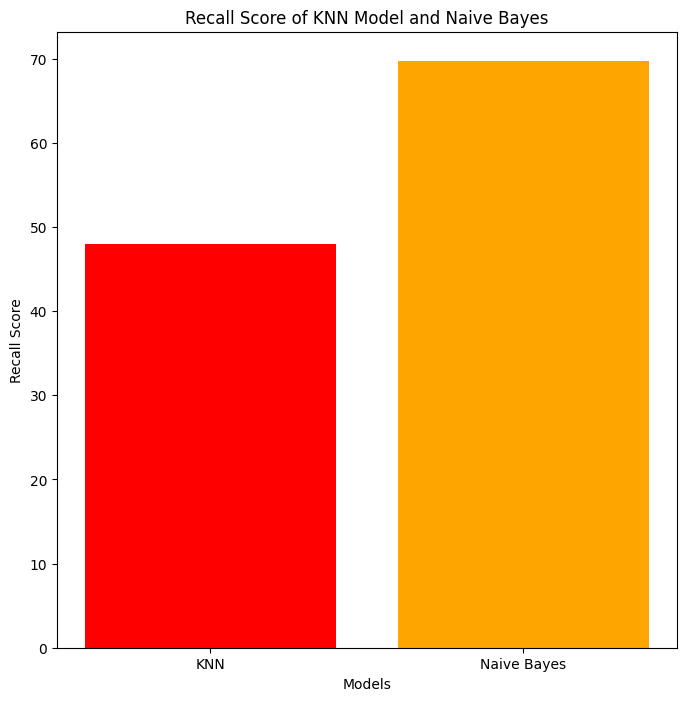

In [71]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['red', 'orange'])
plt.xlabel('Models')
plt.ylabel("Recall Score")
plt.title("Recall Score of KNN Model and Naive Bayes")
plt.show()

In [72]:
print ("Precision Score of Naive Bayes Model:", Precision_Score_of_Naive_Bayes)
print ("Precision Score of Naive Bayes Model:", Precision_Score_of_KNN)

Precision Score of Naive Bayes Model: 38.49060262368387
Precision Score of Naive Bayes Model: 52.27619599239915


In [73]:
x = ['KNN','Naive Bayes']
y = [Precision_Score_of_KNN, Precision_Score_of_Naive_Bayes]
y

[52.27619599239915, 38.49060262368387]

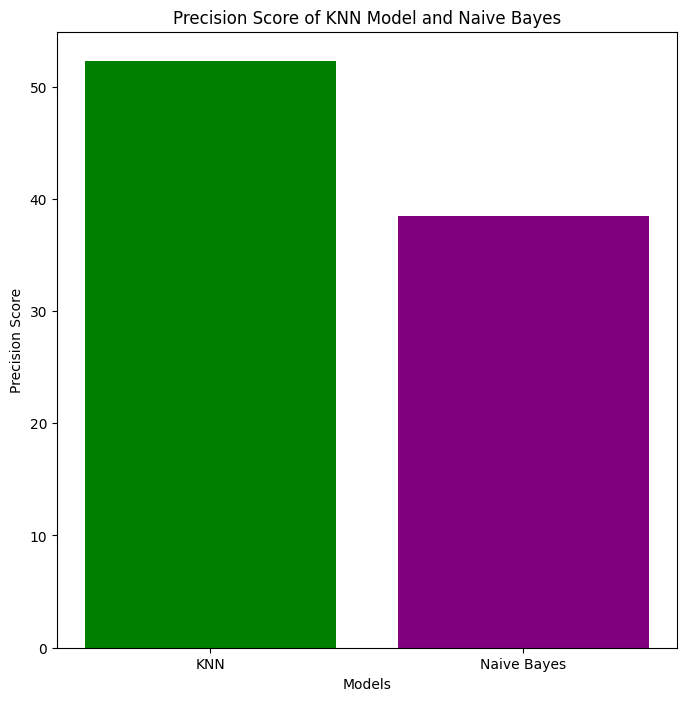

In [74]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['green', 'purple'])
plt.xlabel('Models')
plt.ylabel("Precision Score")
plt.title("Precision Score of KNN Model and Naive Bayes")
plt.show()

In [75]:
print ("F1 Score of Naive Bayes Model:", F1_Score_of_Naive_Bayes)
print ("F1 Score of Naive Bayes Model:", F1_Score_of_KNN)

F1 Score of Naive Bayes Model: 37.396826085456205
F1 Score of Naive Bayes Model: 49.429998469423545


In [76]:
x = ['KNN','Naive Bayes']
y = [F1_Score_of_KNN, F1_Score_of_Naive_Bayes]
y

[49.429998469423545, 37.396826085456205]

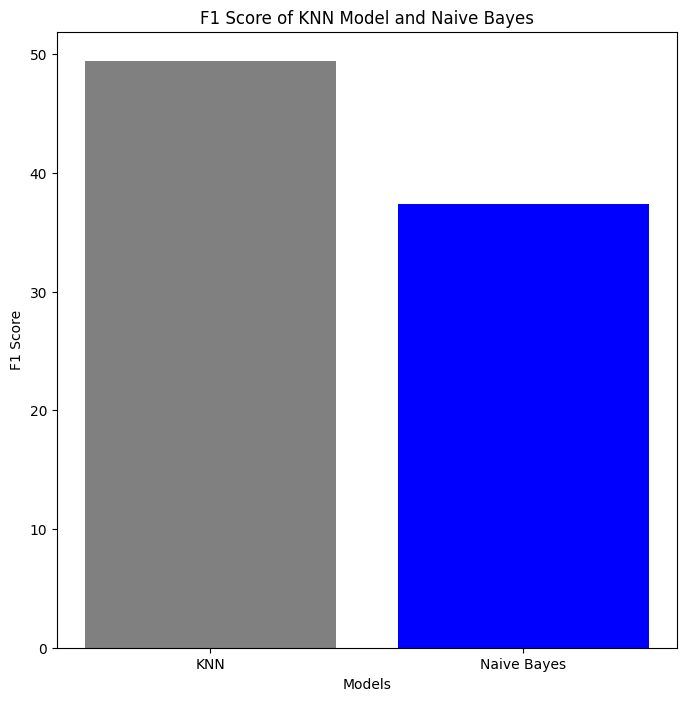

In [77]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['grey', 'blue'])
plt.xlabel('Models')
plt.ylabel("F1 Score")
plt.title("F1 Score of KNN Model and Naive Bayes")
plt.show()